<h1>Entiry Resolution techniques</h1>
application of various distance measuring techniques on the Amazon-Google dataset<br><br>
<strong>the dataset was taken from the paper:</strong><br>
    <p style="padding-left:5em">Köpcke, H., Thor, A., & Rahm, E. (2010). Evaluation of entity resolution approaches on real-world match problems. Proceedings of the VLDB Endowment, 3(1-2), 4 </p>

<h2>Data description</h2>
    The dataset contains 2600 entries with three unique columns -> Amazon, Google, Match  <br>
    <hr>
    <p style="background-color: rgb(255, 127, 0);color:black;font-weight:bold">Amazon column consist of its own titles for products  <span style="position:absolute;right:10em">string</span> <br></p>
    <p style="background-color: rgb(0, 255, 127);color:black;font-weight:bold">Google column consist of its own titles for products  <span style="position:absolute;right:10em">string</span> <br></p>
    <p style="background-color: rgb(127, 0, 255);color:black;font-weight:bold">Match columns consist of 0 or 1, where 0 means no match between both titles and 1 means a match between titles <span style="position:absolute;right:10em">boolean</span> <br></p>

<h2>Add libraries</h2>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import spacy
from string2string.distance import LevenshteinEditDistance, JaccardIndex
from string2string.similarity import JaroSimilarity
from string2string.misc import Tokenizer
import re

<h2>Read target file</h2>

In [16]:
df = pd.read_csv('Amzon_Google.csv',
                 sep=';',
                 encoding='latin1')
df['Match'] = df['Match'].astype(float)
df.head()

,Amazon,Google,Match
0,clickart 950 000 - premier image pack (dvd-rom),clickart 950000 - premier image pack (dvd-rom),1.0
1,noah's ark activity center (jewel case ages 3-8),the beginners bible: noah's ark activity cente...,1.0
2,peachtree by sage premium accounting for nonpr...,sage (ptree) - vernfp2007rt - premium accounti...,1.0
3,singing coach unlimited,singing coach unlimited - electronic learning ...,1.0
4,adobe after effects professional 6.5 upgrade f...,adobe software 22070152 after effects 6.5 pbupgrd,1.0


<h2>Create arrays to handle distance</h2>

In [17]:
LevensteinD = []
JaccardD = []
JaroDC = []
JaroDW = []
trueValls = df['Match'].to_numpy()

<h2>Create function addDistances</h2>
<ol>
<li>Calculate Levenshtein, Jaccard, Jaro distances for each string</li>
<li>Append results to arrays</li>
<li>Append arrays to dataframe</li>
</ol>

In [18]:
def addDistances(df):  
    LevensteinD.clear()
    JaccardD.clear()
    JaroDC.clear()
    JaroDW.clear()
    tokenizer = Tokenizer(word_delimiter=' ')
    LD = LevenshteinEditDistance()
    JD = JaccardIndex()
    JS = JaroSimilarity()
    for ix in df.index:
        # df.Amazon[ix] && df.Google[ix]
        tokenizedAmazon = tokenizer.tokenize(df.Amazon[ix])
        tokenizedGoogle = tokenizer.tokenize(df.Google[ix])
        LDscore = LD.compute(df.Amazon[ix], df.Google[ix])
        LDscoreNorm = LDscore/ max(len(df.Amazon[ix]), len(df.Google[ix]))
        JDscore = JD.compute(tokenizedAmazon, tokenizedGoogle)
        JSCscore = 1 - JS.compute(df.Amazon[ix], df.Google[ix])
        JSWscore = 1 - JS.compute(tokenizedAmazon, tokenizedGoogle)
        # print(LDscore, JDscore, JSCscore, JSWscore)
        # break
        LevensteinD.append(LDscoreNorm)
        JaccardD.append(JDscore)
        JaroDC.append(JSCscore)
        JaroDW.append(JSWscore)
    df = df.drop(['LevensteinD', 'JaccardD','JaroDC', 'JaroDW' ], axis=1, errors='ignore')
    df['LevensteinD'] = LevensteinD
    df['JaccardD'] = JaccardD
    df['JaroDC'] = JaroDC
    df['JaroDW'] = JaroDW
    return df

<h2>Call add distance function</h2

In [19]:
df = addDistances(df)
df.head()

,Amazon,Google,Match,LevensteinD,JaccardD,JaroDC,JaroDW
0,clickart 950 000 - premier image pack (dvd-rom),clickart 950000 - premier image pack (dvd-rom),1.0,0.021277,0.333333,0.086802,0.130952
1,noah's ark activity center (jewel case ages 3-8),the beginners bible: noah's ark activity cente...,1.0,0.640625,0.666667,0.362756,0.430556
2,peachtree by sage premium accounting for nonpr...,sage (ptree) - vernfp2007rt - premium accounti...,1.0,0.338235,0.454545,0.269958,0.216667
3,singing coach unlimited,singing coach unlimited - electronic learning ...,1.0,0.574074,0.571429,0.191358,0.190476
4,adobe after effects professional 6.5 upgrade f...,adobe software 22070152 after effects 6.5 pbupgrd,1.0,0.783784,0.666667,0.353890,0.342857


In [20]:
def plotROC():
    LevensteinD_fpr, LevensteinD_tpr, _ = metrics.roc_curve(trueValls, LevensteinD, pos_label=0)
    JaccardD_fpr, JaccardD_tpr, _ = metrics.roc_curve(trueValls, JaccardD, pos_label=0)
    JaroDC_fpr, JaroDC_tpr, _ = metrics.roc_curve(trueValls, JaroDC, pos_label=0)
    JaroDW_fpr, JaroDW_tpr, _ = metrics.roc_curve(trueValls, JaroDW, pos_label=0)
    plt.plot(LevensteinD_fpr, LevensteinD_tpr, label="Levenstein distance (character level)")
    plt.plot(JaccardD_fpr, JaccardD_tpr, label="Jacard distance (word level)")
    plt.plot(JaroDC_fpr, JaroDC_tpr, label="Jaro distance (character level)")
    plt.plot(JaroDW_fpr, JaroDW_tpr, label="Jaro distance (word level)")
    plt.legend()
    plt.show()

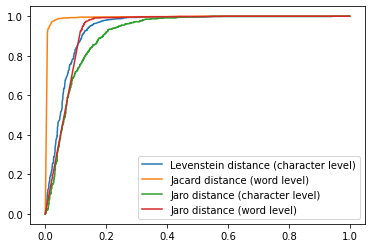

In [21]:
plotROC()

<h2>AUC</h2>
<h3>In order to understand which model performed better I want to find auc as well</h3>

In [22]:
def plotAUC():
    LevensteinD_fpr, LevensteinD_tpr, _ = metrics.roc_curve(trueValls, LevensteinD, pos_label=0)
    JaccardD_fpr, JaccardD_tpr, _ = metrics.roc_curve(trueValls, JaccardD, pos_label=0)
    JaroDC_fpr, JaroDC_tpr, _ = metrics.roc_curve(trueValls, JaroDC, pos_label=0)
    JaroDW_fpr, JaroDW_tpr, _ = metrics.roc_curve(trueValls, JaroDW, pos_label=0)

    LevensteinD_auc = metrics.auc(LevensteinD_fpr, LevensteinD_tpr)
    JaccardD_auc = metrics.auc(JaccardD_fpr, JaccardD_tpr)
    JaroDC_auc = metrics.auc(JaroDC_fpr, JaroDC_tpr)
    JaroDW_auc = metrics.auc(JaroDW_fpr, JaroDW_tpr)

    print("LevensteinD_auc: ", LevensteinD_auc)
    print("JaccardD_auc: ", JaccardD_auc)
    print("JaroDC_auc: ", JaroDC_auc)
    print("JaroDW_auc: ", JaroDW_auc)

In [23]:
plotAUC()

LevensteinD_auc:  0.9396633136094674
JaccardD_auc:  0.9934816568047338
JaroDC_auc:  0.9130097633136095
JaroDW_auc:  0.9350946745562131


<h2>ANALYSIS</h2>
<h3>Looks like the best distance estimator is Jaccard distance. Comparing text by characters presented a good results, however I assumed much worser, <br>
maybe due to relatively small dataset. I assume that the reason jaccard distance being so good is that the complexity of data was relatively easy<br>
We have used titles of products based on the amazon and google data, which by itself is compressed and straightforward.</h3>

<h2>Data preprocessing</h2>
<h3>Let's see if data preprocessing will change the results</h3>
    <ol>
        <li>Punctuations</li>
        <li>Stop words</li>
        <li>Lemmatization</li>
    </ol>

In [24]:
def dataPreprop(df):
    nlp = spacy.load('en_core_web_sm')
    for ix in df.index:
        # df.Amazon[ix] && df.Google[ix]
        filtered = ' '.join(re.findall(r"[-+]?[0-9]+[\.|\-]?[0-9]+|[a-z0-9]+", (df.Amazon[ix])))
        doc = nlp(filtered)
        df.at[ix, "Amazon"] = " ".join([token.lemma_ for token in doc if token.is_stop == False])

        filtered = ' '.join(re.findall(r"[-+]?[0-9]+[\.|\-]?[0-9]+|[a-z0-9]+", (df.Google[ix])))
        doc = nlp(filtered)
        df.at[ix, "Google"] = " ".join([token.lemma_ for token in doc if token.is_stop == False])
    return df



In [25]:
df = dataPreprop(df)
df.tail()

,Amazon,Google,Match,LevensteinD,JaccardD,JaroDC,JaroDW
2595,shape,aspyr media inc enemy territory quake war,0.0,0.906977,1.0,0.496770,1.0
2596,dragon naturally speak standard v9,print shop deluxe 21,0.0,0.810811,1.0,0.486729,1.0
2597,mediarecover,sony media software acid pro 5 music productio...,0.0,0.821429,1.0,0.462698,1.0
2598,mediarecover,instant immersion italian 2.0,0.0,0.862069,1.0,0.542146,1.0
2599,photo explosion 3.0,punch software 85100 punch master landscape pr...,0.0,0.840580,1.0,0.537058,1.0


<h2>Calculate New Distances</h2>

In [26]:
df = addDistances(df)
df.head()

,Amazon,Google,Match,LevensteinD,JaccardD,JaroDC,JaroDW
0,clickart 950 000 premier image pack dvd rom,clickart 950000 premier image pack dvd rom,1.0,0.023256,0.333333,0.102990,0.130952
1,noah s ark activity center jewel case age 3 - 8,beginner bible noah s ark activity center acti...,1.0,0.578947,0.615385,0.341034,0.329966
2,peachtree sage premium account nonprofit 2007,sage ptree vernfp2007rt premium account nonpro...,1.0,0.333333,0.375000,0.247090,0.150794
3,singe coach unlimited,singe coach unlimited electronic learning product,1.0,0.571429,0.500000,0.190476,0.166667
4,adobe effect professional 6.5 upgrade standard...,adobe software 22070152 effect 6.5 pbupgrd,1.0,0.745763,0.666667,0.356907,0.357143


<h2>Plot new ROC</h2>

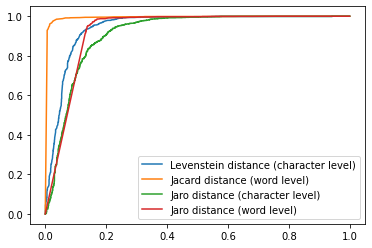

In [27]:
plotROC()

<h2>Plot new AUC</h2>

In [28]:
plotAUC()

LevensteinD_auc:  0.9443047337278105
JaccardD_auc:  0.9935582840236686
JaroDC_auc:  0.9102760355029585
JaroDW_auc:  0.9251523668639053


<h2>ANALYSIS</h2>
<h3>After preprocessing the string the final results did not change much. From the results we can see that Jaccard and Levenstein have benefited from preprocessing while Jaro based distance showed downgrade. I bilieve the reason for a small changes, is that the dataset was relatively small. Therefore number of cases where lemmatization, punctuation and stop words could affect the whole document was at the minimum </h3>

<h2>Updated match technique</h2>

In [38]:
distances = [JaccardD, LevensteinD, JaroDW, JaroDC]
updated = []
for ix in df.index:
    updated.append(((df.JaccardD[ix]*0.9 +df.JaroDW[ix]*0.1) *0.9) + ((LevensteinD[ix]*0.6 + df.JaroDC[ix]*0.4)*0.1))
updated_fpr, updated_tpr, _ = metrics.roc_curve(trueValls, updated, pos_label=0)
updated_auc = metrics.auc(updated_fpr, updated_tpr)

print("Updated_auc: ", updated_auc)

Updated_auc:  0.9947355029585799


<h3>Based on the results of AUC, I have tried to set weights for each distance metric. Results show that <br>
    Jaccard <- Levenstein <- Jaro word level <- Jaro character level.<br>
    Respectively the formula is (Jaccard*0.9+JaroWord*0.1)*0.9 + ((Levenstein*0.6 + JaroCharacter*0.4)*0.1).<br>
    As expected final result outperformed other distances by few points, due to the reason of dataset being relatively small.<br>
    </h3>